# 对红酒数据进行分析

## 1.引入工具包

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Bar, Scatter
from pyecharts import options as opts

## 2.读取数据

In [5]:
# 读取数据
df = pd.read_csv("D:\code\pythonProject\lesson\data\winequality.csv")
df.head(5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.info() # 返回表格的基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [7]:
df.describe()  # 简单的数据统计

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## 3.数据预处理

In [7]:
any(df.duplicated())#数据集是否存在重复值

True

In [8]:
df[df.duplicated()]#查看重复的数据

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6461,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
df = df.drop_duplicates() #删除重复的数据

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         5318 non-null   float64
 1   volatile.acidity      5318 non-null   float64
 2   citric.acid           5318 non-null   float64
 3   residual.sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free.sulfur.dioxide   5318 non-null   float64
 6   total.sulfur.dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 540.1 KB


## 4.数据分析

### （1）箱形图

#### 箱形图（Box-plot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。
它主要用于反映原始数据分布的特征，还可以进行多组数据分布特征的比较。箱形图最大的优点就是不受异常值的影响（异常值也称为离群值），可以以一种相对稳定的方式描述数据的离散分布情况。
一个boxplot主要包含六个数据节点，将一组数据从大到小排列，分别计算出他的上边缘（上限），上四分位数Q3，中位数，下四分位数Q1，下边缘（下限），还有一个异常值。

column ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Figure 1: 单变量箱形图


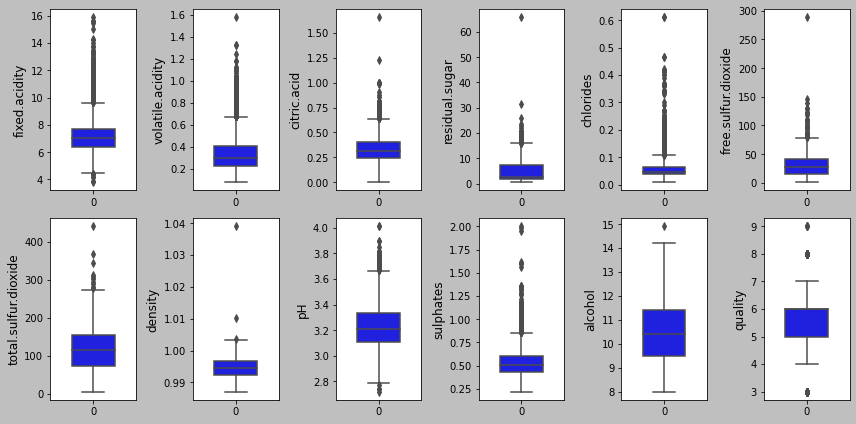

In [11]:
plt.style.use('grayscale')  # 设置图片的背景样式
columnName = df.columns.tolist()  # 列名，并转为list
print('column', columnName)
fig = plt.figure(figsize=(12, 6))  # 创建自定义图像

for i in range(12):
    plt.subplot(2, 6, i+1)  # 参数：行数、列数、第几个图像
    # 箱形图（Box - plot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。
    # 它主要用于反映原始数据分布的特征，还可以进行多组数据分布特征的比较。箱形图最大的优点就是不受异常值的影响（异常值也称为离群值），可以以一种相对稳定的方式描述数据的离散分布情况。
    sns.boxplot(data=df[columnName[i]], orient="v", width=0.5, color='b')
    plt.ylabel(columnName[i], fontsize=12)
# plt.subplots_adjust(left=0.2, wspace=0.8, top=0.9)

# tight_layout会自动调整子图参数，使之填充整个图像区域。这是个实验特性，可能在一些情况下不工作。它仅仅检查坐标轴标签、刻度标签以及标题的部分。
plt.tight_layout()
print('\nFigure 1: 单变量箱形图')

### （2）直方图

#### 反映了每个变量的频率分布情况


Figure 2: 单变量直方图


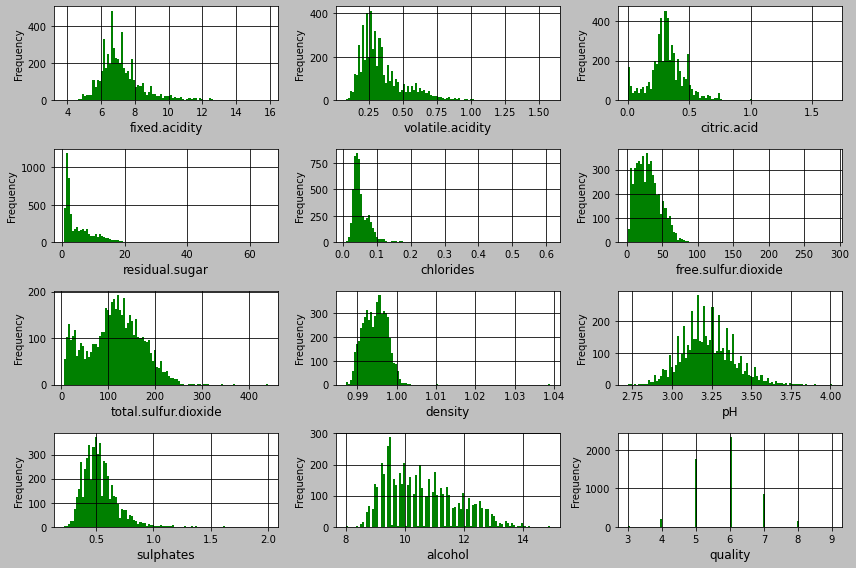

In [12]:
columnName = df.columns.tolist()
plt.figure(figsize=(12, 8))

for i in range(12):
    plt.subplot(4, 3, i+1)
    df[columnName[i]].hist(bins=100, color='g')  # hist:绘制直方图； bins:直方图的柱数
    plt.xlabel(columnName[i], fontsize=12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 2: 单变量直方图')
plt.show()

### （3）甜度分布情况

#### Residual sugar 与酒的甜度相关，通常用来区别各种红酒，干红（<=4 g/L), 半干（4-12 g/L）,半甜（12-45 g/L），和甜（>45 g/L)。 这个数据中，主要为干红，没有甜葡萄酒。

In [24]:
# 创建甜度分组
bins = [0, 4, 12, 45]
labels = ["dry", "medium dry", "semi-sweet"]
df['sweetness'] = pd.cut(df['residual.sugar'], bins=bins, labels=labels)

# 计算各个甜度类别的频率并绘制柱状图
sweetness_count = df['sweetness'].value_counts().reset_index()
bar = (
    Bar(init_opts=opts.InitOpts(width="540px", height="300px"))
    .add_xaxis(list(sweetness_count['index']))
    .add_yaxis(
        "",
        list(sweetness_count['sweetness']),
        label_opts=opts.LabelOpts(is_show=False),
        color='red',
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Sweetness", pos_left="center", title_textstyle_opts=opts.TextStyleOpts(font_size=16)),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
        yaxis_opts=opts.AxisOpts(name='Frequency'),
    )
)
bar.render_notebook()

### （4）酸度

##### 这个数据集有7个酸度相关的特征：fixed acidity, volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, sulphates, pH。

##### 酸度主要是与fixed acidity有关，fixed acidity比volatile acidity和citric acid高1到2个数量级，比free sulfur dioxide, total sulfur dioxide, sulphates高3个数量级。

##### 因此，一个新特征total acid来自于前三个特征的和

In [21]:
#Histogram of Acid Concentration
# 设置数据
bins = 10**(np.linspace(-2, 2))
data = [
    {'value': df['fixed.acidity'].tolist(), 'name': 'fixed acidity'},
    {'value': df['volatile.acidity'].tolist(), 'name': 'volatile acidity'},
    {'value': df['citric.acid'].tolist(), 'name': 'citric acid'}
]

# 绘制直方图
bar = Bar()
bar.add_xaxis(list(map(str, bins)))
for d in data:
    bar.add_yaxis(d['name'], np.histogram(d['value'], bins=bins)[0].tolist(), 
                  label_opts=opts.LabelOpts(is_show=False), 
                  itemstyle_opts=opts.ItemStyleOpts(opacity=0.8))
bar.set_global_opts(
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-30, font_size=14)),
    yaxis_opts=opts.AxisOpts(name="Frequency", name_gap=20, name_location="middle"),
    title_opts=opts.TitleOpts(title="Histogram of Acid Concentration", 
                              pos_left="center", title_textstyle_opts=opts.TextStyleOpts(font_size=16)),
    legend_opts=opts.LegendOpts(pos_right='right', orient='vertical')
)
print('\nFigure 4: 酸度特性直方图')
bar.render_notebook()


Figure 4: 酸度特性直方图


In [18]:
# 总酸度
df['total acid'] = df['fixed.acidity'] + df['volatile.acidity'] + df['citric.acid']

### （5）密度和酒精浓度

#### 密度和酒精浓度是相关的，物理上，两者并不是线性关系。Figure 5展示了两者的关系。另外密度还与酒中其他物质的含量有关，但是关系很小。

In [22]:
#密度和酒精浓度
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

scatter = Scatter()
scatter.add_xaxis(df['density'])
scatter.add_yaxis('Alcohol', df['alcohol'], symbol_size=10)

scatter.set_global_opts(
    xaxis_opts=opts.AxisOpts(name='Density', min_=0.989, max_=1.005),
    yaxis_opts=opts.AxisOpts(name='Alcohol', min_=7, max_=16),
    title_opts=opts.TitleOpts(title='', pos_left='center')
)

scatter.set_series_opts(
    label_opts=opts.LabelOpts(is_show=False),
    itemstyle_opts=opts.ItemStyleOpts(color='green')
)

print('\nFigure 5: 密度和酒精浓度')
scatter.render_notebook()


Figure 5: 密度和酒精浓度


### （6）红酒品质和理化特征的关系

#### 下面Figure 6显示了红酒理化特征和品质的关系。其中可以看出的趋势有：

品质好的酒有更高的柠檬酸，硫酸盐，和酒精度数。硫酸盐(硫酸钙)的加入通常是调整酒的酸度的。其中酒精度数和品质的相关性最高。

品质好的酒有较低的挥发性酸类，密度，和pH。

残留糖分，氯离子，二氧化硫似乎对酒的品质影响不大。


Figure 6: 红酒品质和理化特征的关系箱形图


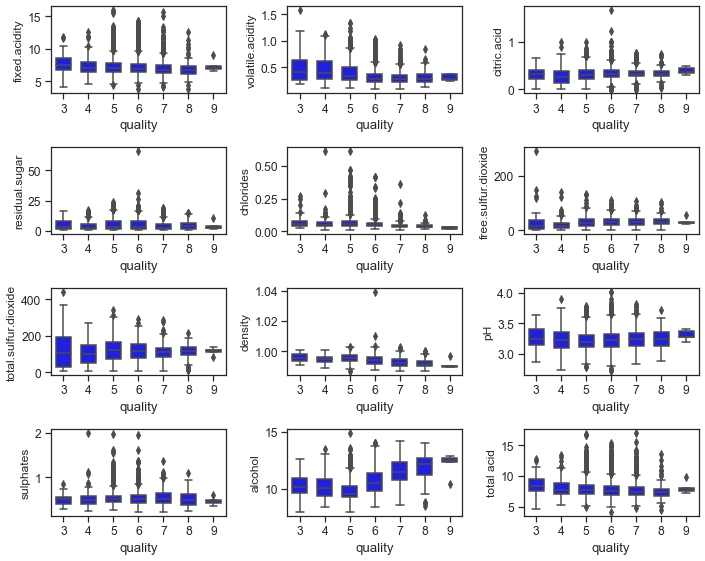

In [19]:
#红酒品质和理化特征的关系
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.1)

colnm = df.columns.tolist()[:11]+ ['total acid']
plt.figure(figsize = (10, 8))

for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(x ='quality', y = colnm[i], data = df, color = 'b', width = 0.6)    
    plt.ylabel(colnm[i],fontsize = 12)
plt.tight_layout()
print("\nFigure 6: 红酒品质和理化特征的关系箱形图")